In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Do Anh Luyen\Downloads\Melbourne_housing_FULL.csv', header = 0)

In [3]:
df['YearBuilt'].value_counts()

1970.0    915
1960.0    851
1950.0    719
1980.0    480
1900.0    370
         ... 
1891.0      1
1892.0      1
1881.0      1
1893.0      1
1897.0      1
Name: YearBuilt, Length: 143, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9863 non-null   object 
 1   Address        9863 non-null   object 
 2   Rooms          9853 non-null   float64
 3   Type           9838 non-null   object 
 4   Price          9672 non-null   float64
 5   Method         9863 non-null   object 
 6   SellerG        9863 non-null   object 
 7   Date           9863 non-null   object 
 8   Distance       9863 non-null   float64
 9   Postcode       9863 non-null   int64  
 10  Bedroom2       9845 non-null   float64
 11  Bathroom       9850 non-null   float64
 12  Car            9839 non-null   float64
 13  Landsize       9776 non-null   float64
 14  BuildingArea   9765 non-null   float64
 15  YearBuilt      9839 non-null   float64
 16  CouncilArea    9863 non-null   object 
 17  Lattitude      9863 non-null   float64
 18  Longtitu

In [5]:
df = df.drop('Bedroom2',axis= 1)

In [6]:
df['CouncilArea'].value_counts()

Boroondara City Council           900
Darebin City Council              798
Moreland City Council             713
Moonee Valley City Council        606
Glen Eira City Council            580
Maribyrnong City Council          530
Melbourne City Council            504
Brimbank City Council             472
Banyule City Council              464
Hume City Council                 424
Bayside City Council              417
Yarra City Council                364
Port Phillip City Council         357
Monash City Council               336
Stonnington City Council          333
Hobsons Bay City Council          312
Manningham City Council           294
Whittlesea City Council           274
Kingston City Council             226
Wyndham City Council              187
Whitehorse City Council           141
Melton City Council               124
Maroondah City Council            122
Knox City Council                 112
Frankston City Council             95
Greater Dandenong City Council     58
Casey City C

# Pre

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
#null
df.isnull().sum()

Suburb             0
Address            0
Rooms             10
Type              25
Price            191
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bathroom          13
Car               24
Landsize          87
BuildingArea      98
YearBuilt         24
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [9]:
#'Rooms','Bedroom2','Bathroom','Car','Type' using Most_frequent
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df.Rooms = imputer.fit_transform(df['Rooms'].values.reshape(-1,1))[:,0]
df.Bathroom = imputer.fit_transform(df['Bathroom'].values.reshape(-1,1))[:,0]
df.Car = imputer.fit_transform(df['Car'].values.reshape(-1,1))[:,0]
df.Type = imputer.fit_transform(df['Type'].values.reshape(-1,1))[:,0]

In [10]:
df[df.select_dtypes(['int32']).columns] = df.select_dtypes(['int32']).apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         9863 non-null   object        
 1   Address        9863 non-null   object        
 2   Rooms          9863 non-null   float64       
 3   Type           9863 non-null   object        
 4   Price          9672 non-null   float64       
 5   Method         9863 non-null   object        
 6   SellerG        9863 non-null   object        
 7   Date           9863 non-null   datetime64[ns]
 8   Distance       9863 non-null   float64       
 9   Postcode       9863 non-null   int64         
 10  Bathroom       9863 non-null   float64       
 11  Car            9863 non-null   float64       
 12  Landsize       9776 non-null   float64       
 13  BuildingArea   9765 non-null   float64       
 14  YearBuilt      9839 non-null   float64       
 15  CouncilArea    9863 n

In [11]:
#year
a = df.groupby('Regionname', as_index=False)['YearBuilt'].median()
a

,Regionname,YearBuilt
0,Eastern Metropolitan,1970.0
1,Eastern Victoria,1980.0
2,Northern Metropolitan,1970.0
3,Northern Victoria,1990.0
4,South-Eastern Metropolitan,1975.0
5,Southern Metropolitan,1960.0
6,Western Metropolitan,1975.0
7,Western Victoria,1976.0


In [12]:
df.Bathroom.value_counts()

1.0    4661
2.0    4218
3.0     838
4.0     109
5.0      29
6.0       4
7.0       2
9.0       1
8.0       1
Name: Bathroom, dtype: int64

In [13]:
#yearbuild median region
for j in range(len(a)):    
    for i in df[df['YearBuilt'].isnull()].index.tolist():
        if df['Regionname'][i] == a['Regionname'][j]:
            df['YearBuilt'][i] = str(df['YearBuilt'][i]).replace(str(df['YearBuilt'][i]),str(a['YearBuilt'][j]))

In [14]:
#price,landsize,buildingarea mean region
for k in ['Price','Landsize','BuildingArea']:
    b = df.groupby('Regionname', as_index=False)[k].mean()
    for j in range(len(b)):    
        for i in df[df[k].isnull()].index.tolist():
            if df['Regionname'][i] == b['Regionname'][j]:
                df[k][i] = str(df[k][i]).replace(str(df[k][i]),str(b[k][j]))

In [15]:
for k in ['Price','Landsize','BuildingArea']:
    b = df.groupby('Regionname', as_index=False)[k].mean()
a = pd.DataFrame(df.groupby('Regionname', as_index=False)['Price'].mean())
b = pd.DataFrame(df.groupby('Regionname', as_index=False)['Landsize'].mean())
c = pd.DataFrame(df.groupby('Regionname', as_index=False)['BuildingArea'].mean())
a = a.merge(b, on = 'Regionname')
a = a.merge(c, on = 'Regionname')
a

,Regionname,Price,Landsize,BuildingArea
0,Eastern Metropolitan,1.149456e+06,660.420370,172.544875
1,Eastern Victoria,6.681293e+05,979.407407,171.395370
2,Northern Metropolitan,8.746337e+05,447.176840,128.495012
3,Northern Victoria,5.971232e+05,1866.652174,166.435429
4,South-Eastern Metropolitan,9.123950e+05,613.086420,158.549003
5,Southern Metropolitan,1.499605e+06,490.353703,160.408369
6,Western Metropolitan,8.727735e+05,499.355040,148.280446
7,Western Victoria,4.364184e+05,706.895833,130.680816


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         9863 non-null   object        
 1   Address        9863 non-null   object        
 2   Rooms          9863 non-null   float64       
 3   Type           9863 non-null   object        
 4   Price          9863 non-null   float64       
 5   Method         9863 non-null   object        
 6   SellerG        9863 non-null   object        
 7   Date           9863 non-null   datetime64[ns]
 8   Distance       9863 non-null   float64       
 9   Postcode       9863 non-null   int64         
 10  Bathroom       9863 non-null   float64       
 11  Car            9863 non-null   float64       
 12  Landsize       9863 non-null   float64       
 13  BuildingArea   9863 non-null   float64       
 14  YearBuilt      9863 non-null   float64       
 15  CouncilArea    9863 n

# phan tich

In [17]:
df = df.drop(['Postcode','Address'], axis = 1)

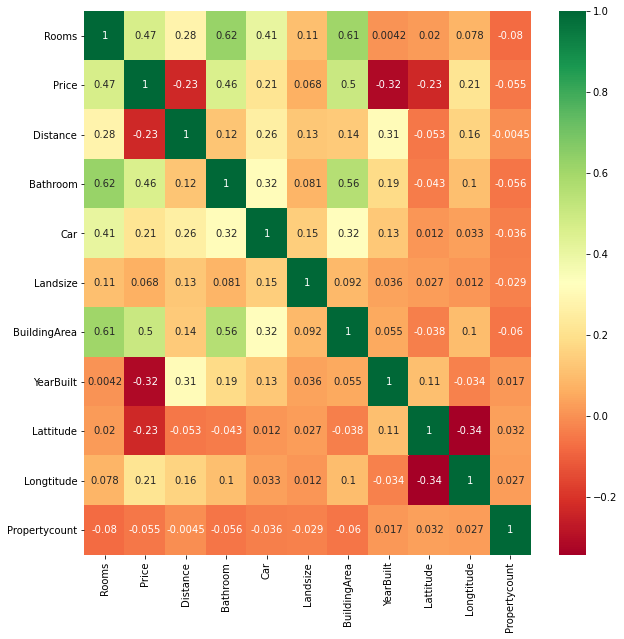

In [18]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=20) #fontsize of the legend
plt.rcParams["figure.figsize"] = (20,10)

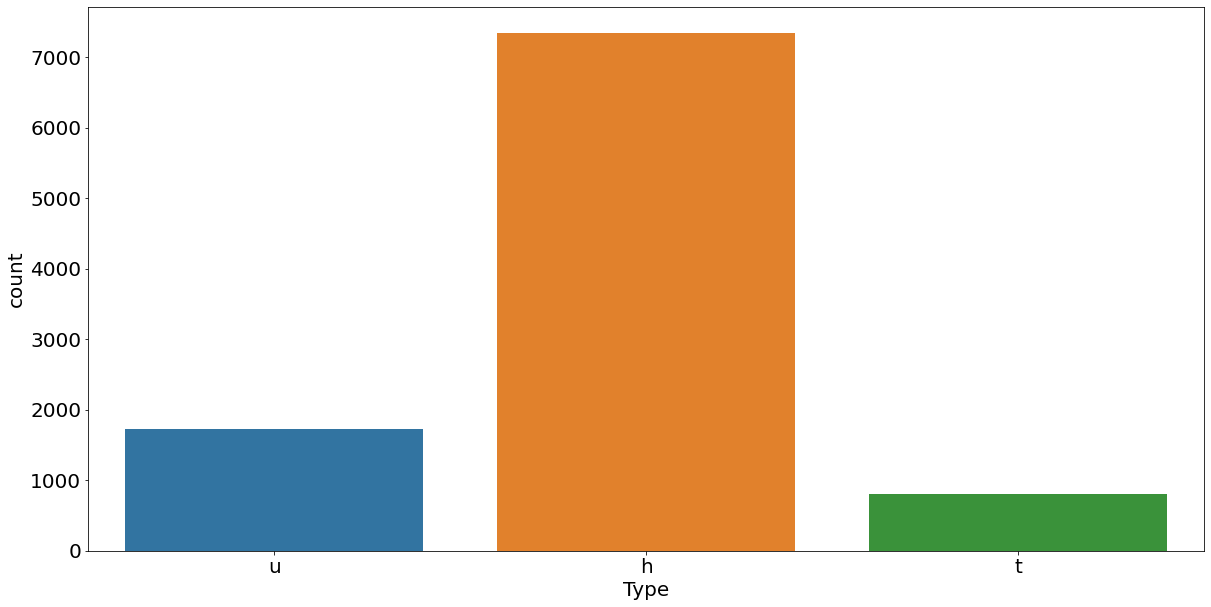

In [20]:
sns.countplot(df['Type'])
plt.show()

a = pd.DataFrame(df['Rooms'].value_counts())
b = pd.DataFrame(df['Bedroom2'].value_counts())
c = pd.DataFrame(df['Bathroom'].value_counts())
a.reset_index(inplace=True)
b.reset_index(inplace=True)
c.reset_index(inplace=True)
a = a.merge(b,on = 'index')
a = a.merge(c,on = 'index')
a = a.sort_values(by = 'index')
w = 0.2
x = ['1','2','3','4','5','6','7','8']
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

b = plt.bar(bar1,a['Rooms'],w,label="Rooms")
c =plt.bar(bar2,a['Bedroom2'],w,label="Bedroom")
d = plt.bar(bar3,a['Bathroom'],w,label="Bathroom")
plt.xticks(bar1,x)
plt.xlabel("number")
plt.ylabel("count")
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
plt.rc('font', size=12) 
autolabel(b)
autolabel(c)
autolabel(d)
plt.legend()
plt.show()

In [21]:
gr = df.groupby('Date', as_index=False)['Price'].mean()
gr1 = df.groupby('YearBuilt',as_index = False)['Price'].mean()
gr2 = df.groupby('Suburb', as_index=False)['Price'].mean()
gr3 = df.groupby('Type', as_index=False)['Price'].mean()
gr4 = df.groupby('Regionname', as_index=False)['Price'].mean()
gr5 = df.groupby('Method', as_index=False)['Price'].mean()

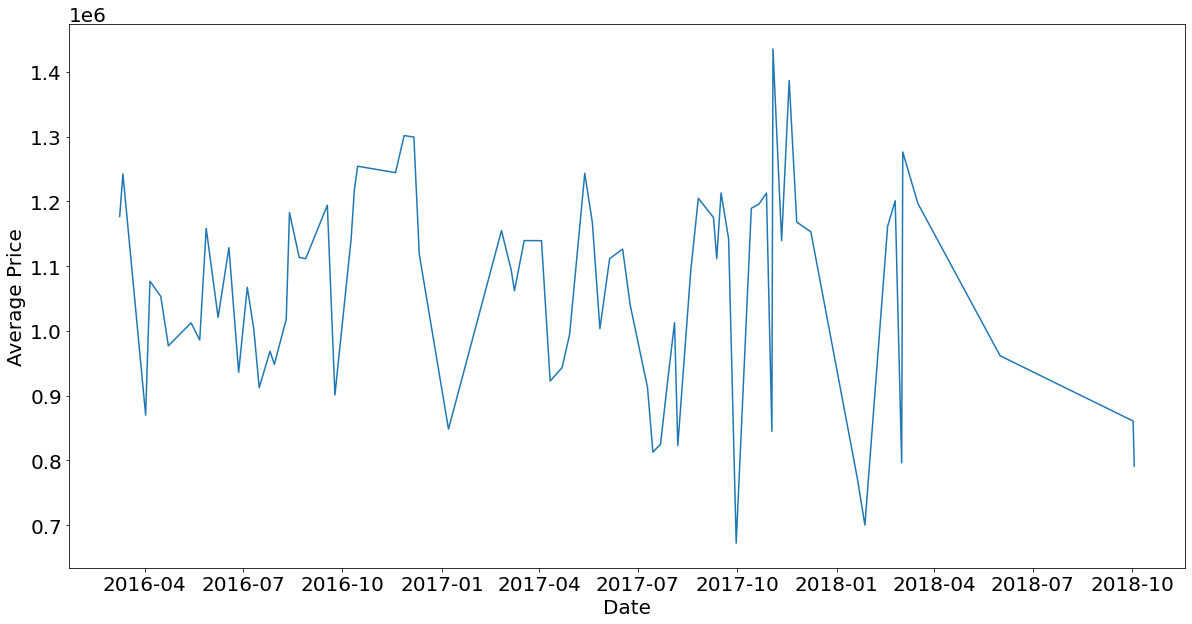

<Figure size 1440x720 with 0 Axes>

In [22]:
plt.plot(gr['Date'],gr['Price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.figure()
plt.show()

In [23]:
df['Age'] = 2018 - df['YearBuilt']

In [24]:
df['Historic'] = np.where(df['Age']>=50,'Historic','Modern')

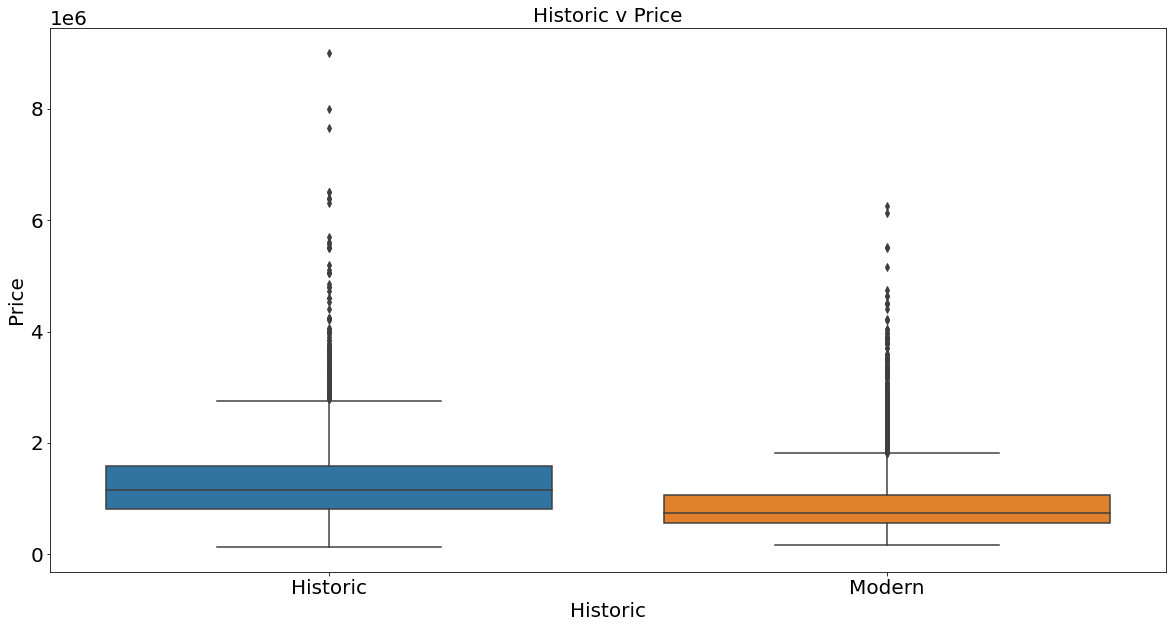

In [25]:
sns.boxplot(x = 'Historic', y = 'Price', data = df)
plt.xlabel('Historic')
plt.ylabel('Price')
plt.title('Historic v Price')
plt.show()

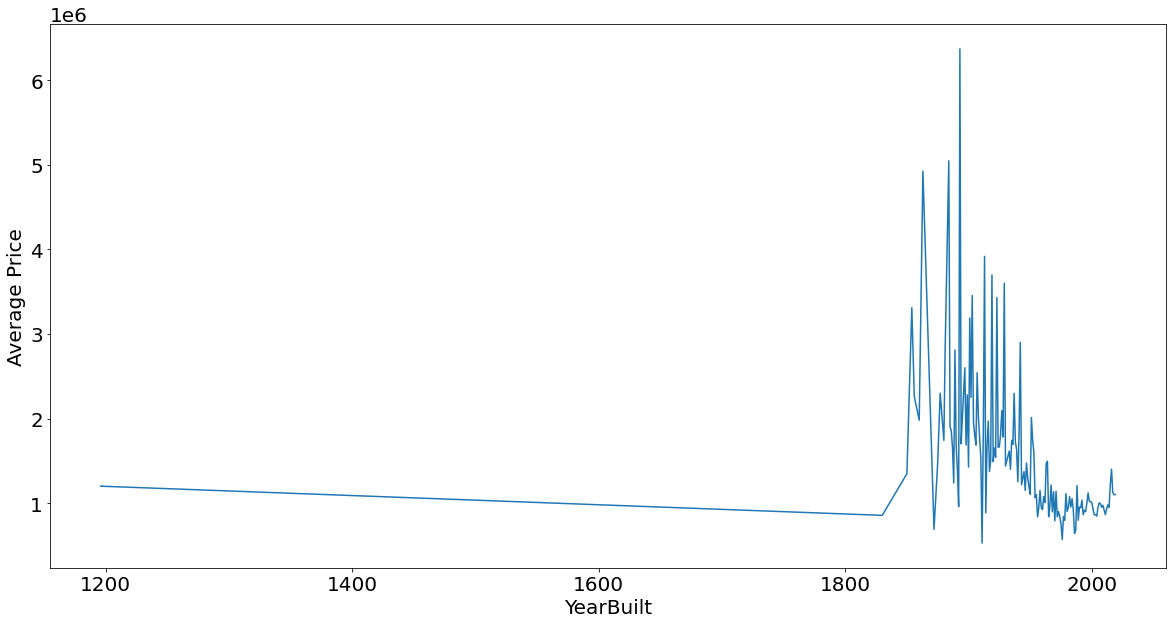

<Figure size 1440x720 with 0 Axes>

In [26]:
plt.plot(gr1['YearBuilt'],gr1['Price'])
plt.xlabel('YearBuilt')
plt.ylabel('Average Price')
plt.figure()
plt.show()

In [27]:
gr2 = gr2.sort_values(by = 'Price',ascending = False)
gr2

,Suburb,Price
178,Kooyong,3.080000e+06
197,Middle Park,2.483736e+06
95,Deepdene,2.380000e+06
60,Canterbury,2.373483e+06
185,Malvern,2.167368e+06
...,...,...
67,Caulfield,4.369000e+05
191,Melton,4.265526e+05
291,Wallan,4.227500e+05
19,Bacchus Marsh,4.120000e+05


In [28]:
x1 = df.Type.value_counts()
x1 = pd.DataFrame(x1)
x1.reset_index(inplace=True)
x1 = x1.rename(columns = {'index':'Type','Type':'value'})

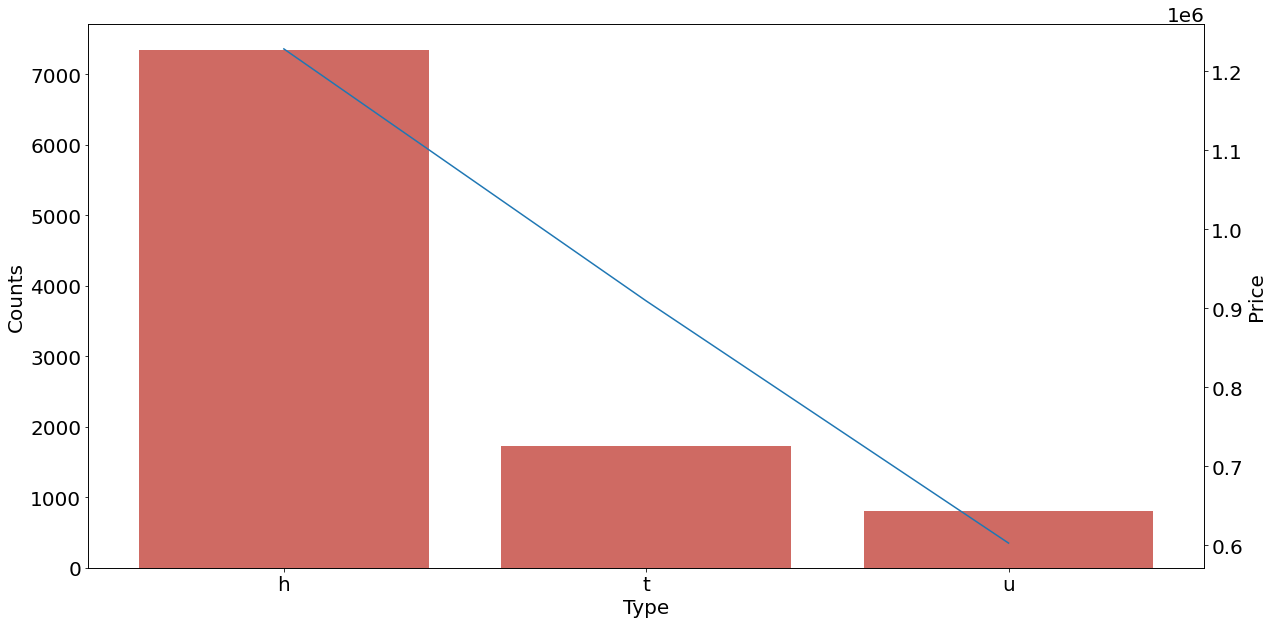

In [29]:
ax1=plt.subplot(1,1,1)
ax1.bar(x1['Type'],x1['value'],color = '#cf6a63')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Type')
ax2 = ax1.twinx()
ax2.plot(gr3['Type'],gr3['Price'])
ax2.set_ylabel('Price')
plt.show()

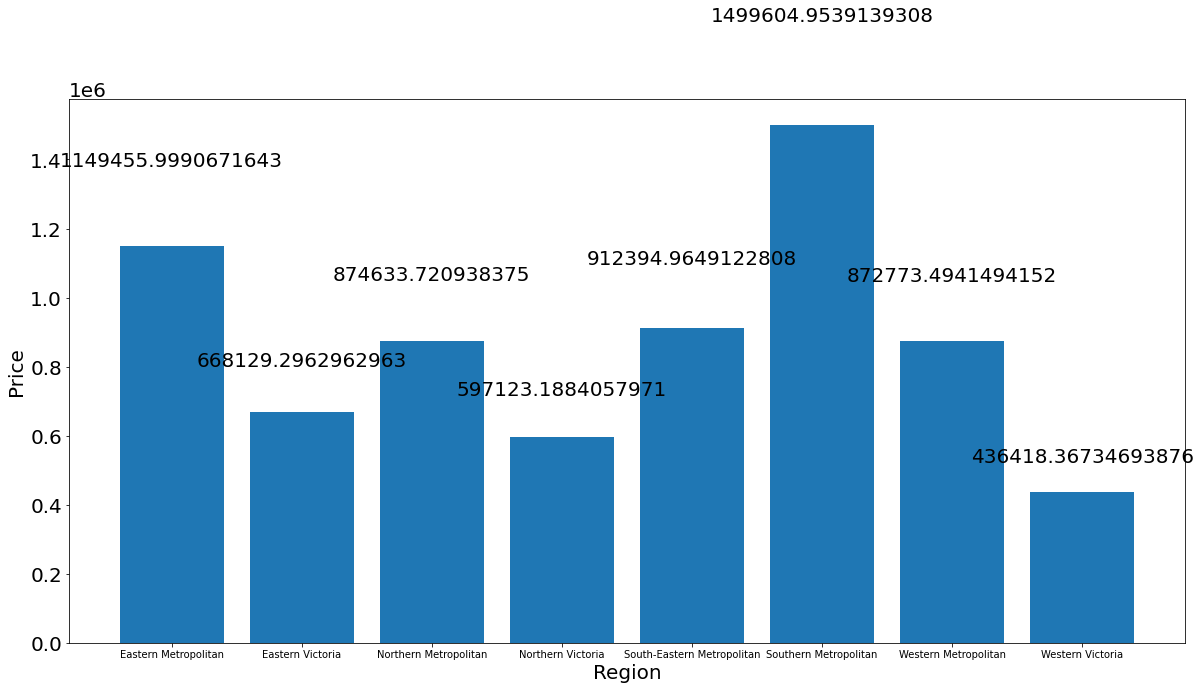

In [30]:
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]*1.2, y[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = gr4['Regionname']
    y = gr4['Price']
    # setting figure size by using figure() function 
    plt.figure(figsize = (20, 10))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
      
    # giving X and Y labels
    plt.xlabel("Region")
    plt.ylabel("Price")
    # visualizing the plot
    plt.show()

In [31]:
x = df.Method.value_counts()
x = pd.DataFrame(x)
x.reset_index(inplace=True)
df.reset_index(inplace=True)
x = x.rename(columns = {'index':'Method','Method':'value'})
gr5 = gr5.sort_values(by = 'Price',ascending = False)
x = x.merge(gr5, on='Method')
x

,Method,value,Price
0,S,6152,1.084849e+06
1,SP,1440,9.270246e+05
2,PI,1208,1.187306e+06
3,VB,938,1.290704e+06
4,SA,69,9.945506e+05
5,SN,43,1.109713e+06
6,PN,7,1.230963e+06
7,W,5,8.814419e+05
8,SS,1,1.499605e+06


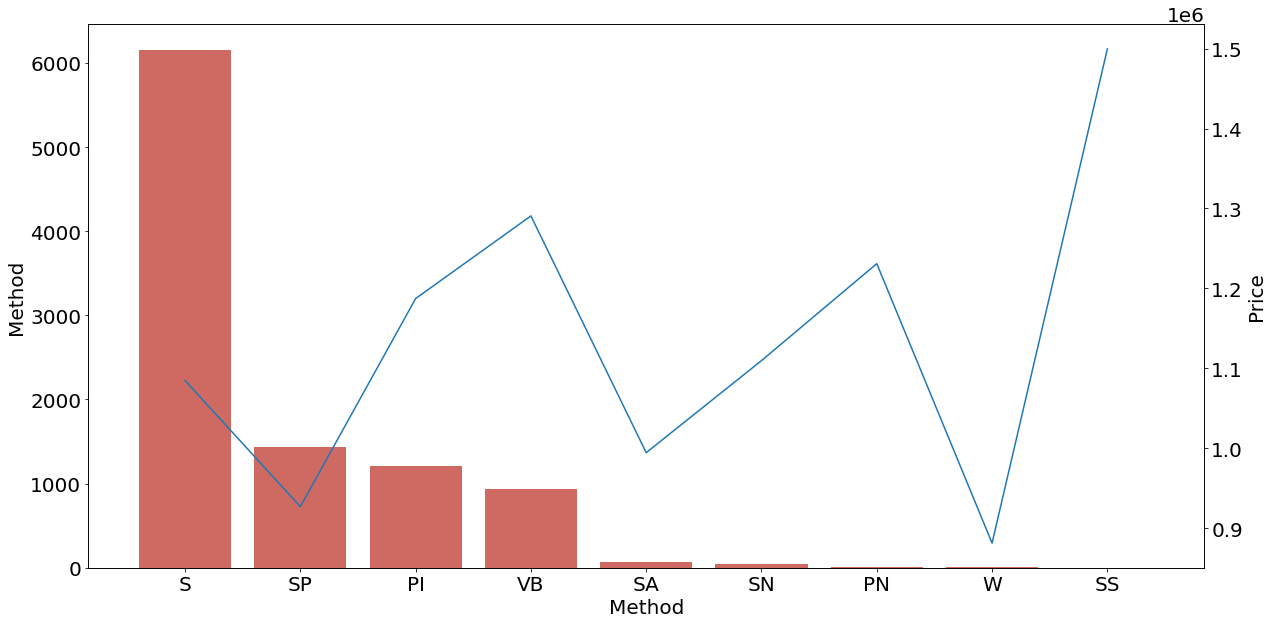

In [32]:
plt.rc('xtick', labelsize=20)
ax1=plt.subplot(1,1,1)
ax2 = ax1.twinx()
ax1.bar(x['Method'],x['value'],color = '#cf6a63')
ax1.set_ylabel('Method')
ax1.set_xlabel('Method')
ax2.plot(x['Method'],x['Price'])
ax2.set_ylabel('Price')
plt.show()

In [33]:
#10 tk ban nhieu nha nhat
df['SellerG'].value_counts().head(10)

Nelson           1074
Jellis            971
Barry             840
hockingstuart     760
Ray               567
Marshall          484
Buxton            462
Biggin            265
Brad              235
Fletchers         212
Name: SellerG, dtype: int64

In [34]:
#NHÀ Ở ĐÂU RẺ NHẤT / m2
df['P/m2']= df['Price']//df['BuildingArea']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna()

,index,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic,P/m2
0,0,South Melbourne,2.0,u,650000.0,VB,hockingstuart,2017-08-04,2.1,1.0,...,2.0,1900.0,Port Phillip City Council,-37.83530,144.95990,Southern Metropolitan,5943,118.0,Historic,325000.0
1,1,Reservoir,3.0,h,570000.0,VB,Nelson,2017-11-11,12.0,2.0,...,80.0,1960.0,Darebin City Council,-37.69680,145.01820,Northern Metropolitan,21650,58.0,Historic,7125.0
2,2,Roxburgh Park,4.0,h,630000.0,SP,YPA,2018-06-01,20.6,2.0,...,198.0,2003.0,Hume City Council,-37.61958,144.92492,Northern Metropolitan,5833,15.0,Modern,3181.0
3,3,Glen Waverley,4.0,h,1439000.0,S,Barry,2017-10-21,16.7,2.0,...,158.0,1970.0,Monash City Council,-37.87215,145.17259,Eastern Metropolitan,15321,48.0,Modern,9107.0
4,4,Abbotsford,2.0,h,1012500.0,S,Nelson,2016-05-28,2.5,1.0,...,82.0,1900.0,Yarra City Council,-37.80210,144.99760,Northern Metropolitan,4019,118.0,Historic,12347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,9858,Southbank,4.0,u,990000.0,S,Ray,2016-07-05,1.2,3.0,...,172.0,1995.0,Melbourne City Council,-37.82670,144.96870,Southern Metropolitan,8400,23.0,Modern,5755.0
9859,9859,Footscray,3.0,h,755000.0,PI,hockingstuart,2017-08-26,5.1,1.0,...,110.0,1920.0,Maribyrnong City Council,-37.79770,144.90398,Western Metropolitan,7570,98.0,Historic,6863.0
9860,9860,Camberwell,3.0,h,3400000.0,S,Jellis,2017-02-25,7.8,2.0,...,146.0,1960.0,Boroondara City Council,-37.84370,145.06230,Southern Metropolitan,8920,58.0,Historic,23287.0
9861,9861,Yarraville,3.0,h,1360000.0,PI,Jas,2017-09-23,6.3,1.0,...,128.0,1930.0,Maribyrnong City Council,-37.81279,144.87717,Western Metropolitan,6543,88.0,Historic,10625.0


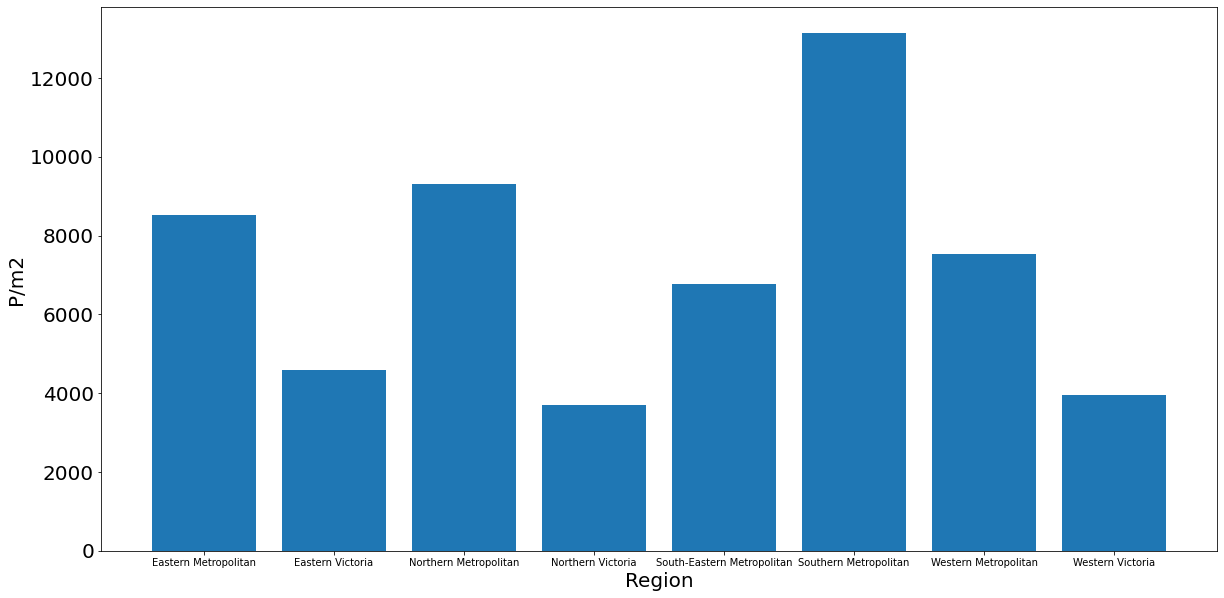

In [35]:
grp1 = df.groupby('Regionname', as_index=False)['P/m2'].mean()
plt.rc('xtick', labelsize=10)
plt.bar(grp1['Regionname'],grp1['P/m2'])
plt.xlabel("Region")
plt.ylabel("P/m2")
plt.show()

In [36]:
pt = df.pivot_table(values = 'Historic',columns='Regionname',aggfunc = (lambda x: x.mode()))
pt = pt.T

In [37]:
# tai sao nha lai rẻ
a = df.groupby('Regionname', as_index=False)['Distance','Landsize','BuildingArea','Propertycount','P/m2'].mean()
a = a.merge(pt, on = 'Regionname')
a.sort_values(by = 'Distance', ascending = False)
# Giá ở bang victoria rẻ hơn bởi có Distance xa (Distance from CBD in Kilometres)
#Tuy nhiên lại có Landsize và BuildingArea rộng hơn Metropolitan và Propertycount thấp hơn nên có thể hiểu là nhà ở rộng rãi hơn và khu vực đó ít dân cư, nhiều không gian hơn, ít tiếng ồn và giảm ô nhiễm hơn => có môi trường sống tốt hơn

,Regionname,Distance,Landsize,BuildingArea,Propertycount,P/m2,Historic
1,Eastern Victoria,35.083333,979.407407,171.395370,9089.462963,4578.500000,Modern
3,Northern Victoria,31.998571,1866.652174,166.435429,4773.371429,3713.000000,Modern
7,Western Victoria,30.693878,706.895833,130.680816,4181.653061,3947.795918,Modern
4,South-Eastern Metropolitan,24.945122,613.086420,158.549003,6915.124390,6785.706601,Modern
0,Eastern Metropolitan,14.742648,660.420370,172.544875,6055.565297,8519.687729,Modern
6,Western Metropolitan,10.685011,499.355040,148.280446,6016.493570,7539.641208,Modern
2,Northern Metropolitan,9.397926,447.176840,128.495012,9327.166609,9320.091638,Modern
5,Southern Metropolitan,8.944814,490.353703,160.408369,7502.341126,13142.940437,Historic


In [38]:
Regionname = ['Victoria','Victoria','Victoria','Metropolitan','Metropolitan','Metropolitan','Metropolitan','Metropolitan']
Regionname = pd.DataFrame(Regionname,columns=['Region'])
Regionname

,Region
0,Victoria
1,Victoria
2,Victoria
3,Metropolitan
4,Metropolitan
5,Metropolitan
6,Metropolitan
7,Metropolitan


In [39]:
a

,Regionname,Distance,Landsize,BuildingArea,Propertycount,P/m2,Historic
0,Eastern Metropolitan,14.742648,660.420370,172.544875,6055.565297,8519.687729,Modern
1,Eastern Victoria,35.083333,979.407407,171.395370,9089.462963,4578.500000,Modern
2,Northern Metropolitan,9.397926,447.176840,128.495012,9327.166609,9320.091638,Modern
3,Northern Victoria,31.998571,1866.652174,166.435429,4773.371429,3713.000000,Modern
4,South-Eastern Metropolitan,24.945122,613.086420,158.549003,6915.124390,6785.706601,Modern
5,Southern Metropolitan,8.944814,490.353703,160.408369,7502.341126,13142.940437,Historic
6,Western Metropolitan,10.685011,499.355040,148.280446,6016.493570,7539.641208,Modern
7,Western Victoria,30.693878,706.895833,130.680816,4181.653061,3947.795918,Modern


In [40]:
loc = pd.DataFrame(df[['Regionname','CouncilArea']].drop_duplicates())
loc = pd.DataFrame(loc['Regionname'].value_counts())
loc.reset_index (inplace=True)
loc.columns=['Regionname','Number of CouncilArea']
a = a.merge(loc,on = 'Regionname')
a = pd.DataFrame(a)
a = a.drop(['Regionname','P/m2','Historic'],axis =1)
a = a.sort_values(by = 'Distance', ascending = False).reset_index (drop= True)
b = pd.concat([Regionname,a],axis=1)
#Một lí do nữa là do số lượng councilArea của Metropolitan nhiều hơn hẳn Victoria => more safety

In [41]:
b

,Region,Distance,Landsize,BuildingArea,Propertycount,Number of CouncilArea
0,Victoria,35.083333,979.407407,171.395370,9089.462963,4
1,Victoria,31.998571,1866.652174,166.435429,4773.371429,6
2,Victoria,30.693878,706.895833,130.680816,4181.653061,2
3,Metropolitan,24.945122,613.086420,158.549003,6915.124390,6
4,Metropolitan,14.742648,660.420370,172.544875,6055.565297,8
5,Metropolitan,10.685011,499.355040,148.280446,6016.493570,8
6,Metropolitan,9.397926,447.176840,128.495012,9327.166609,7
7,Metropolitan,8.944814,490.353703,160.408369,7502.341126,8


In [42]:
b.columns

Index(['Region', 'Distance', 'Landsize', 'BuildingArea', 'Propertycount',
       'Number of CouncilArea'],
      dtype='object')

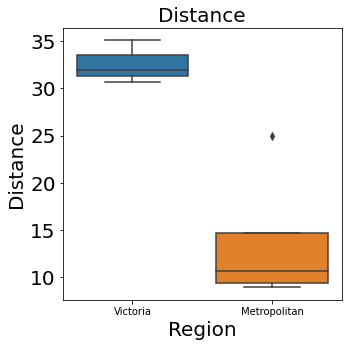

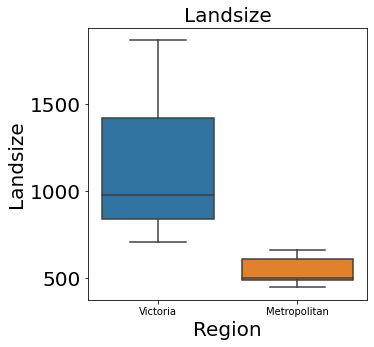

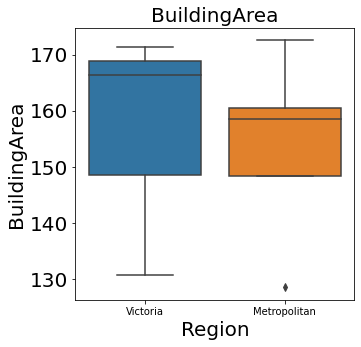

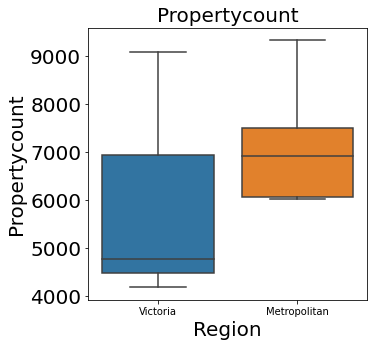

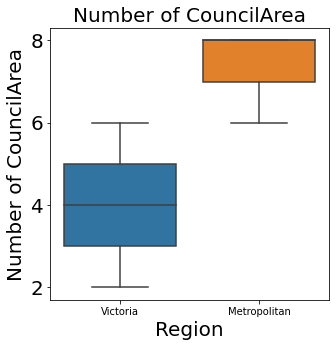

In [43]:
for i in ['Distance', 'Landsize', 'BuildingArea', 'Propertycount','Number of CouncilArea']:    
    plt.figure(figsize=(5,5))
    sns.boxplot(x = 'Region', y = i, data = b ) 
    plt.xlabel('Region')
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [44]:
df.groupby('Suburb', as_index=False)['P/m2'].mean().sort_values(by = 'P/m2',ascending = False)

,Suburb,P/m2
37,Boronia,59723.500000
21,Balwyn,58240.846154
14,Ashwood,36037.789474
145,Hampton East,26584.350000
82,Collingwood,26038.604167
...,...,...
240,Riddells Creek,2999.000000
100,Diggers Rest,2935.000000
25,Beaconsfield,2745.000000
179,Kurunjang,2724.555556


In [45]:
# Boronia và Balwyn có giá nhà cao hơn hẳn các chỗ khác và đều thuộc Metropiliant
df1=df.loc[df['Suburb'] == 'Boronia',['Suburb','Regionname']].drop_duplicates()
df2=df.loc[df['Suburb'] == 'Balwyn',['Suburb','Regionname']].drop_duplicates()
pd.concat([df1, df2], ignore_index=True)

,Suburb,Regionname
0,Boronia,Eastern Metropolitan
1,Balwyn,Southern Metropolitan


In [46]:
df = df.drop(['index','SellerG','Date'],axis = 1)
df

,Suburb,Rooms,Type,Price,Method,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic,P/m2
0,South Melbourne,2.0,u,650000.0,VB,2.1,1.0,0.0,438.0,2.0,1900.0,Port Phillip City Council,-37.83530,144.95990,Southern Metropolitan,5943,118.0,Historic,325000.0
1,Reservoir,3.0,h,570000.0,VB,12.0,2.0,1.0,284.0,80.0,1960.0,Darebin City Council,-37.69680,145.01820,Northern Metropolitan,21650,58.0,Historic,7125.0
2,Roxburgh Park,4.0,h,630000.0,SP,20.6,2.0,2.0,610.0,198.0,2003.0,Hume City Council,-37.61958,144.92492,Northern Metropolitan,5833,15.0,Modern,3181.0
3,Glen Waverley,4.0,h,1439000.0,S,16.7,2.0,2.0,663.0,158.0,1970.0,Monash City Council,-37.87215,145.17259,Eastern Metropolitan,15321,48.0,Modern,9107.0
4,Abbotsford,2.0,h,1012500.0,S,2.5,1.0,0.0,182.0,82.0,1900.0,Yarra City Council,-37.80210,144.99760,Northern Metropolitan,4019,118.0,Historic,12347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,Southbank,4.0,u,990000.0,S,1.2,3.0,1.0,0.0,172.0,1995.0,Melbourne City Council,-37.82670,144.96870,Southern Metropolitan,8400,23.0,Modern,5755.0
9859,Footscray,3.0,h,755000.0,PI,5.1,1.0,2.0,334.0,110.0,1920.0,Maribyrnong City Council,-37.79770,144.90398,Western Metropolitan,7570,98.0,Historic,6863.0
9860,Camberwell,3.0,h,3400000.0,S,7.8,2.0,4.0,877.0,146.0,1960.0,Boroondara City Council,-37.84370,145.06230,Southern Metropolitan,8920,58.0,Historic,23287.0
9861,Yarraville,3.0,h,1360000.0,PI,6.3,1.0,1.0,479.0,128.0,1930.0,Maribyrnong City Council,-37.81279,144.87717,Western Metropolitan,6543,88.0,Historic,10625.0


In [47]:
#feature enginering
from sklearn.preprocessing import LabelEncoder
lb =  LabelEncoder()
df['Suburb'] = lb.fit_transform(df['Suburb'])
df['Type'] = lb.fit_transform(df['Type'])
df['Method'] = lb.fit_transform(df['Method'])
df['CouncilArea'] = lb.fit_transform(df['CouncilArea'])
df['Regionname'] = lb.fit_transform(df['Regionname'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9863 non-null   int32  
 1   Rooms          9863 non-null   float64
 2   Type           9863 non-null   int32  
 3   Price          9863 non-null   float64
 4   Method         9863 non-null   int32  
 5   Distance       9863 non-null   float64
 6   Bathroom       9863 non-null   float64
 7   Car            9863 non-null   float64
 8   Landsize       9863 non-null   float64
 9   BuildingArea   9863 non-null   float64
 10  YearBuilt      9863 non-null   float64
 11  CouncilArea    9863 non-null   int32  
 12  Lattitude      9863 non-null   float64
 13  Longtitude     9863 non-null   float64
 14  Regionname     9863 non-null   int32  
 15  Propertycount  9863 non-null   int64  
 16  Age            9863 non-null   float64
 17  Historic       9863 non-null   object 
 18  P/m2    

In [49]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df[df.select_dtypes(['int32']).columns] = df.select_dtypes(['int32']).apply(lambda x: x.astype('category'))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         9863 non-null   category
 1   Rooms          9863 non-null   float64 
 2   Type           9863 non-null   category
 3   Price          9863 non-null   float64 
 4   Method         9863 non-null   category
 5   Distance       9863 non-null   float64 
 6   Bathroom       9863 non-null   float64 
 7   Car            9863 non-null   float64 
 8   Landsize       9863 non-null   float64 
 9   BuildingArea   9863 non-null   float64 
 10  YearBuilt      9863 non-null   float64 
 11  CouncilArea    9863 non-null   category
 12  Lattitude      9863 non-null   float64 
 13  Longtitude     9863 non-null   float64 
 14  Regionname     9863 non-null   category
 15  Propertycount  9863 non-null   int64   
 16  Age            9863 non-null   float64 
 17  Historic       9863 non-null   ca

In [51]:
# train_test split
X = df.drop(['Price','P/m2','Suburb','YearBuilt','Historic'],axis=1)
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
X_name = X_train.columns

In [52]:
#scale training and tranform testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train

array([[0.27272727, 0.        , 0.25      , ..., 0.        , 0.21560604,
        0.05346294],
       [0.27272727, 0.        , 0.625     , ..., 0.85714286, 0.15051032,
        0.03523694],
       [0.27272727, 0.        , 0.875     , ..., 0.85714286, 0.21301914,
        0.0072904 ],
       ...,
       [0.36363636, 0.        , 0.25      , ..., 0.28571429, 0.54226048,
        0.0291616 ],
       [0.        , 1.        , 0.        , ..., 0.28571429, 0.66732515,
        0.01701094],
       [0.09090909, 1.        , 0.25      , ..., 0.71428571, 0.51356945,
        0.05953827]])

Score R^2 for training: 0.5904279537223847
Score R^2 for testing: 0.6202994317128641
mean_squared_error: 189322881989.7476
mean_absolute_error: 278415.0279982148
coeficient [ 1.18467552e+06 -3.12100626e+05  1.12166500e+03 -1.77323358e+06
  1.01147393e+06  4.97768669e+05  1.25637534e+06  5.02150956e+06
 -7.44177690e+04 -6.98080376e+05  1.45924773e+06  2.87229405e+05
  5.50329403e+04  2.62865282e+06]
intercept 151550.4800679027


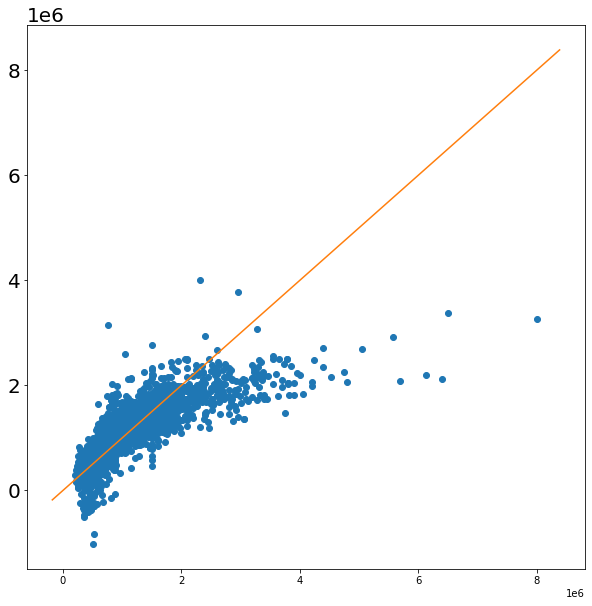

In [54]:
#model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
y_lr = lr.predict(X_test)
print('Score R^2 for training: {}'.format(lr.score(X_train,y_train)))
print('Score R^2 for testing: {}'.format(lr.score(X_test,y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, y_lr)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, y_lr)))
print('coeficient {}'.format(lr.coef_))
print('intercept {}'.format(lr.intercept_))
y_predict = lr.predict(X_test)
fig = plt.figure(figsize=(10,10))
plt.plot(y_test,y_predict,'o')
axes = plt.gca()
plt.plot(axes.get_xlim(),axes.get_xlim(), '-')
plt.show()

In [55]:
def Predictive_Model(estimator):
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)
    print('R_squared:', metrics.r2_score(y_test, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)
def FeatureBar(model_Features, Title, yLabel):
    plt.figure(figsize=(10,5))
    plt.bar(df.columns[df.columns!='Price'].values, model_Features)
    plt.xticks(rotation=45)
    plt.title(Title)
    plt.ylabel(yLabel)

In [60]:
from sklearn.model_selection import cross_validate
scoring={'R_squared':'r2','MSE':'neg_mean_squared_error','MAE':'neg_mean_absolute_error'}
scores = cross_validate(LinearRegression(), X, y, cv=10, scoring=scoring)
scores

{'fit_time': array([0.01042604, 0.01073503, 0.01156735, 0.0110662 , 0.01661515,
        0.00909305, 0.00798893, 0.00799394, 0.00801253, 0.00800681]),
 'score_time': array([0.01224685, 0.00307131, 0.        , 0.00799441, 0.00647855,
        0.00802016, 0.00799489, 0.00834632, 0.01154757, 0.0091238 ]),
 'test_R_squared': array([0.5216485 , 0.61335384, 0.58670401, 0.62512958, 0.62498669,
        0.51016476, 0.62091719, 0.6361355 , 0.60866952, 0.61445128]),
 'test_MSE': array([-2.61544275e+11, -1.89589079e+11, -1.96134770e+11, -1.39066723e+11,
        -1.82760306e+11, -1.98494608e+11, -1.69492201e+11, -1.44465108e+11,
        -1.76655076e+11, -1.94098888e+11]),
 'test_MAE': array([-287781.43364739, -278669.16595422, -281691.58463059,
        -247890.61326346, -283187.40343522, -275056.82140029,
        -269921.02117648, -256488.23682492, -261528.86078879,
        -283876.76232598])}

In [61]:
from sklearn.model_selection import cross_validate
scoring={'R_squared':'r2','MSE':'neg_mean_squared_error','MAE':'neg_mean_absolute_error'}
def CrossVal(estimator):
    scores = cross_validate(estimator, X, y, cv=10, scoring=scoring)
    r2 = scores['test_R_squared'].mean()
    mse = abs(scores['test_MSE'].mean())
    mae = abs(scores['test_MAE'].mean())
    print('R_squared:', r2)
    print('mean squared error:', mse)
    print('Mean Absolute error:',mae)
lr1 = CrossVal(LinearRegression())

R_squared: 0.5962160876591651
mean squared error: 185230103440.0272
Mean Absolute error: 272609.1903447336


In [92]:
a = ['R_squared','mean squared error', 'Mean Absolute error']
b = ['0.62512958',
'1.39066723e+11',
 '247890.61326346']
lr1 = pd.DataFrame(b,a).T

In [93]:
lr1

,R_squared,mean squared error,Mean Absolute error
0,0.62512958,1.39066723e+11,247890.61326346


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
y_kn = kn.predict(X_test)

In [ ]:
print('Score R^2 for testing: {}'.format(kn.score(X_test,y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, y_kn)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, y_kn)))

In [ ]:
a = ['R_squared','mean squared error', 'Mean Absolute error']
b = [kn.score(X_test,y_test),
mean_squared_error(y_test, y_kn),
mean_absolute_error(y_test, y_kn)]
knm = pd.DataFrame(b,a).T
knm

In [159]:

print("'Best parameters':{n_neighbors: 6}")


'Best parameters':{n_neighbors: 6}


In [132]:
grid_search2 = KNeighborsRegressor(n_neighbors=6).fit(X_train,y_train)

In [133]:
print("Test score Decision Tree: {}".format(grid_search2.score(X_test, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test,grid_search2.predict(X_test))))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test,grid_search2.predict(X_test))))

Test score Decision Tree: 0.6918464973643896
mean_squared_error: 153648727673.4623
mean_absolute_error: 232317.08594152788


In [134]:
a = ['R_squared','mean squared error', 'Mean Absolute error']
b = [grid_search2.score(X_test, y_test),mean_squared_error(y_test,grid_search2.predict(X_test)),mean_absolute_error(y_test,grid_search2.predict(X_test))]
knm = pd.DataFrame(b,a).T
knm

,R_squared,mean squared error,Mean Absolute error
0,0.691846,1.536487e+11,232317.085942


In [146]:
c = []
for i in range(1,20):
    kn = KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train)
    c.append(kn.score(X_test,y_test))    

In [147]:
c = pd.DataFrame(c)
c.index += 1 

In [148]:
c.reset_index (inplace=True)
c.columns = ['Index','R_squared']
c

,Index,R_squared
0,1,0.583602
1,2,0.660133
2,3,0.669042
3,4,0.676858
4,5,0.687561
5,6,0.691846
6,7,0.690026
7,8,0.687729
8,9,0.689304
9,10,0.686674


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticks'

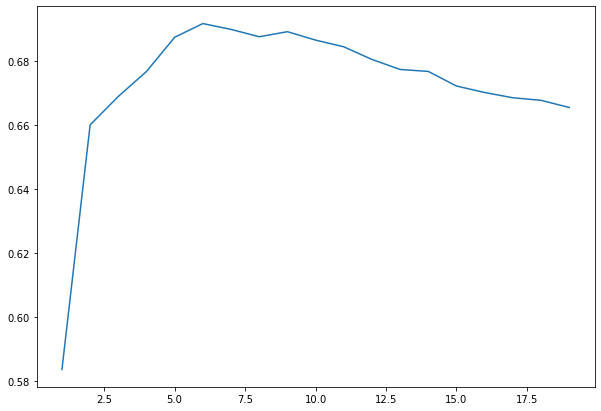

In [152]:
plt.figure(figsize=(10,7))
plt.plot(c.Index,c.R_squared)
plt.set_xticks(np.arange(len(x)))
plt.ylabel('R_squared')
plt.xlabel('number of neighbors')
plt.show()

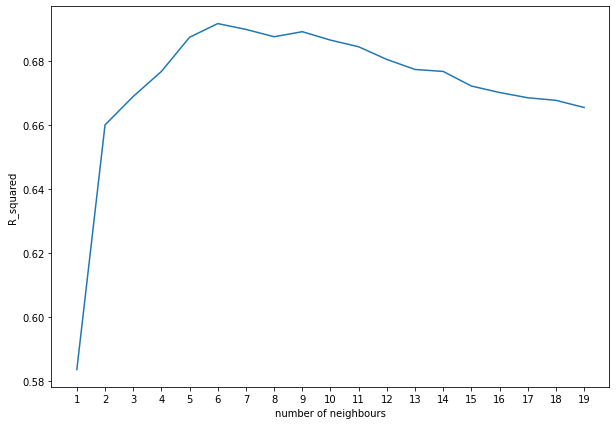

In [158]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(len(c['Index'])), c['R_squared'])
ax1.set_xticklabels(c['Index'])
ax1.set_xticks(np.arange(len(c['Index'])))
ax1.set_xlabel('number of neighbours')
ax1.set_ylabel('R_squared')
plt.show()

In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 5,random_state = 0).fit(X_train,y_train)
y_dt = dt.predict(X_test)
print('Score R^2 for training : {}'.format(dt.score(X_train,y_train)))
print('Score R^2 for testing : {}'.format(dt.score(X_test,y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, y_dt)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, y_dt)))
print('max_depth:{}'.format(dt.tree_.max_depth))

Score R^2 for training : 0.6524590836554045
Score R^2 for testing : 0.6365917294970826
mean_squared_error: 181199363016.2103
mean_absolute_error: 272385.1602010175
max_depth:5


In [65]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_7 <= 0.07
|   |--- feature_13 <= 0.08
|   |   |--- feature_7 <= 0.04
|   |   |   |--- feature_1 <= 0.75
|   |   |   |   |--- feature_9 <= 0.57
|   |   |   |   |   |--- value: [838942.56]
|   |   |   |   |--- feature_9 >  0.57
|   |   |   |   |   |--- value: [620936.41]
|   |   |   |--- feature_1 >  0.75
|   |   |   |   |--- feature_7 <= 0.02
|   |   |   |   |   |--- value: [442099.59]
|   |   |   |   |--- feature_7 >  0.02
|   |   |   |   |   |--- value: [650644.04]
|   |   |--- feature_7 >  0.04
|   |   |   |--- feature_9 <= 0.55
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: [729217.35]
|   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |--- value: [1207273.62]
|   |   |   |--- feature_9 >  0.55
|   |   |   |   |--- feature_3 <= 0.26
|   |   |   |   |   |--- value: [874992.54]
|   |   |   |   |--- feature_3 >  0.26
|   |   |   |   |   |--- value: [650754.98]
|   |--- feature_13 >  0.08
|   |   |--- feature_7 <= 0.04
|   |   |   |--- feat

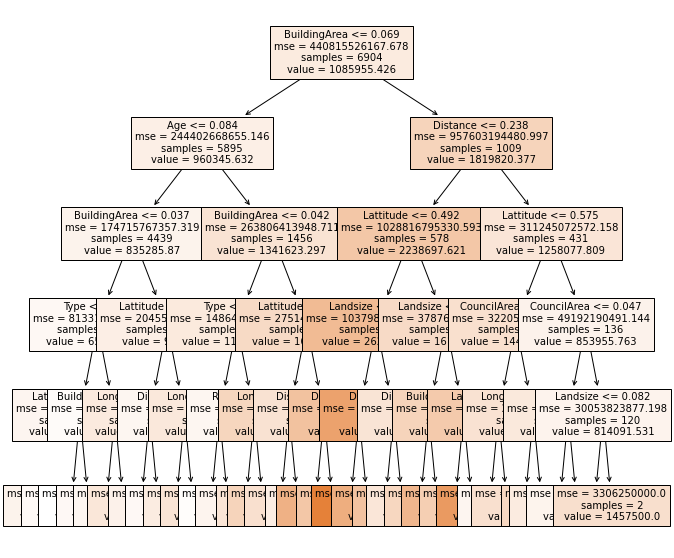

In [66]:
fig = plt.figure(figsize=(10,10))

_ = tree.plot_tree(dt, 
                   feature_names=X_name,  
                   class_names='Price',
                   filled=True,fontsize=10)

In [67]:
# Fine_tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split' : range(10,100,20),'max_depth': range(1,20,2)}
grid_search1 = GridSearchCV(dt, param_grid, cv=5)
grid_search1.fit(X_train, y_train)
#evaluation
print("Best parameters Decision Tree: {}".format(grid_search1.best_params_))
print("Test set score Decision Tree: {}".format(grid_search1.score(X_test, y_test)))

Best parameters Decision Tree: {'max_depth': 9, 'min_samples_split': 50}
Test set score Decision Tree: 0.704319126946537


In [68]:
grid_search1 = grid_search1.best_estimator_
grid_search1

DecisionTreeRegressor(max_depth=9, min_samples_split=50, random_state=0)

In [69]:
print("Test score Decision Tree: {}".format(grid_search1.score(X_test, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test,grid_search1.predict(X_test))))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test,grid_search1.predict(X_test))))

Test score Decision Tree: 0.704319126946537
mean_squared_error: 147429737301.2988
mean_absolute_error: 229781.04177558183


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


criterion = ['mse', 'friedman_mse', 'mae', 'poisson']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 60]

# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
pprint(random_grid)
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42)
# Fit the random search model
dt_random.fit(X_train, y_train)
print("Best parameters: {}".format(dt_random.best_params_))

{'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
 'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 60]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.3s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae, total=   0.2s
[CV] min_samples_split=60, max_features=sqrt, max_depth=1, criterion=mae 
[CV]  min_samples_spli

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.6s finished


In [71]:
dt_random = dt_random.best_estimator_

In [72]:
#model evaluation
print("Test set score: {}".format(dt_random.score(X_test, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, dt_random.predict(X_test))))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, dt_random.predict(X_test))))

Test set score: 0.6720848698255719
mean_squared_error: 163502092642.95502
mean_absolute_error: 236906.4086678569


#Gridsearch gets higher score
#visualization
text_representation = tree.export_text(grid_search1)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_search1, 
                   feature_names=X_name,  
                   class_names='Price',
                   filled=True,fontsize=10)

In [73]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10,n_estimators = 100,random_state = 42).fit(X_train,y_train)
y_rf = rf.predict(X_test)
print('Score R^2 for training: {}'.format(rf.score(X_train,y_train)))
print('Score R^2 for testing: {}'.format(rf.score(X_test,y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, y_rf)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, rf.predict(X_test))))

Score R^2 for training: 0.9091951144419309
Score R^2 for testing: 0.8093241784590304
mean_squared_error: 95073063026.33783
mean_absolute_error: 180633.12290855122


features = X_name
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.rc('font', size=10) 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [135]:
# Fine tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
'n_estimators': [10,50,100,150]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
#evalution
print("Best parameters Random Forest: {}".format(grid_search.best_params_))
print("Test set score Random Forest: {}".format(grid_search.score(X_test, y_test)))

Best parameters Random Forest: {'max_depth': 10, 'n_estimators': 150}
Test set score Random Forest: 0.8106803914167178


In [136]:
grid_search = grid_search.best_estimator_

In [137]:
#evaluation
print("Test set score Random Forest: {}".format(grid_search.score(X_test, y_test)))

Test set score Random Forest: 0.8106803914167178


In [138]:
y_rf = grid_search.predict(X_test)
print('Score R^2 for training: {}'.format(grid_search.score(X_train,y_train)))
print('Score R^2 for testing: {}'.format(grid_search.score(X_test,y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, y_rf)))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, rf.predict(X_test))))

Score R^2 for training: 0.9092279562153106
Score R^2 for testing: 0.8106803914167178
mean_squared_error: 94396840320.37901
mean_absolute_error: 180633.12290855122


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
pprint(random_grid)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)
print("Best parameters: {}".format(rf_random.best_params_))

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_es

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Best parameters: {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}


In [76]:
#model evaluation
rf_random = rf_random.best_estimator_
print("Test set score: {}".format(rf_random.score(X_test, y_test)))
print('mean_squared_error: {}'.format(mean_squared_error(y_test, rf_random.predict(X_test))))
print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, rf_random.predict(X_test))))

Test set score: 0.8350479943888568
mean_squared_error: 82246885310.62354
mean_absolute_error: 160281.1240167967


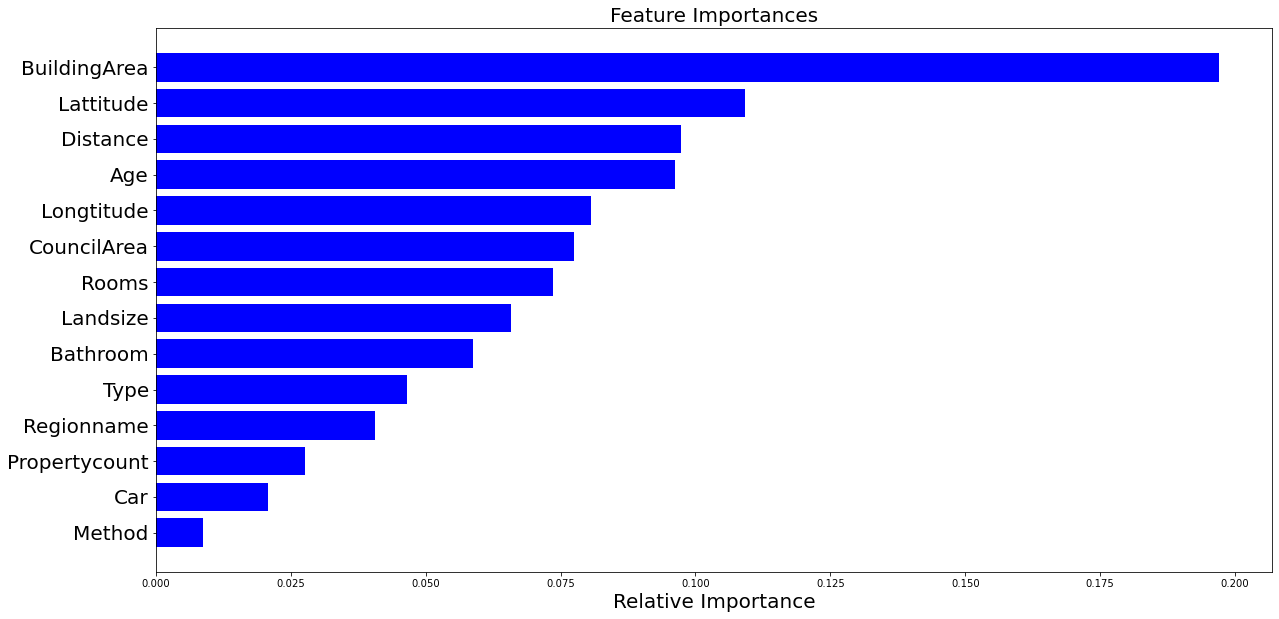

In [77]:
features = X_name
importances = rf_random.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [139]:
#model evaluation
model = pd.DataFrame(['Linear Regression','KNN','Decision Tree', 'Random Forest'])
Scoreb = pd.DataFrame([lr.score(X_test,y_test),lr.score(X_test,y_test),dt.score(X_test, y_test),rf.score(X_test,y_test)])
Score = pd.DataFrame([lr1['R_squared'][0],grid_search1.score(X_test, y_test),rf_random.score(X_test,y_test)])
MSEb = pd.DataFrame([mean_squared_error(y_test, y_lr),mean_squared_error(y_test,dt.predict(X_test)),mean_squared_error(y_test,rf.predict(X_test))])
MSE = pd.DataFrame([lr1['mean squared error'][0],mean_squared_error(y_test,grid_search1.predict(X_test)),mean_squared_error(y_test,rf_random.predict(X_test))])
MAEb = pd.DataFrame([mean_absolute_error(y_test, y_lr),mean_absolute_error(y_test, dt.predict(X_test)),mean_absolute_error(y_test, rf.predict(X_test))])
MAE = pd.DataFrame([lr1['Mean Absolute error'][0],mean_absolute_error(y_test, grid_search1.predict(X_test)),mean_absolute_error(y_test, rf_random.predict(X_test))])
table = pd.concat([model, Scoreb,Score,MSEb,MSE,MAEb,MAE],ignore_index = True, axis=1)
table.columns = ['Model','Score R^2 before Fine_Tuning','Score R^2 Fine_Tuning','MSE before Fine_Tuning','MSE Fine_Tuning','MAE before Fine_Tuning','MAE Fine_Tuning']
table

,Model,Score R^2 before Fine_Tuning,Score R^2 Fine_Tuning,MSE before Fine_Tuning,MSE Fine_Tuning,MAE before Fine_Tuning,MAE Fine_Tuning
0,Linear Regression,0.620299,0.62512958,1.893229e+11,1.39066723e+11,278415.027998,247890.61326346
1,KNN,0.636592,0.704319,1.811994e+11,1.4743e+11,272385.160201,229781
2,Decision Tree,0.809324,0.835048,9.507306e+10,8.22469e+10,180633.122909,160281
3,Random Forest,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
model = pd.DataFrame(['Linear Regression','KNN','Decision Tree', 'Random Forest'])
Scoreb = pd.DataFrame([lr.score(X_test,y_test),kn.score(X_test,y_test),dt.score(X_test, y_test),rf.score(X_test,y_test)])
Score = pd.DataFrame([0.62512958,grid_search2.score(X_test, y_test),grid_search1.score(X_test, y_test),rf_random.score(X_test,y_test)])
MSEb = pd.DataFrame([mean_squared_error(y_test, y_lr),mean_squared_error(y_test, y_kn),mean_squared_error(y_test,dt.predict(X_test)),mean_squared_error(y_test,rf.predict(X_test))])
MSE = pd.DataFrame([1.39066723e+11,mean_squared_error(y_test,grid_search2.predict(X_test)),mean_squared_error(y_test,grid_search1.predict(X_test)),mean_squared_error(y_test,rf_random.predict(X_test))])
MAEb = pd.DataFrame([mean_absolute_error(y_test, y_lr),mean_absolute_error(y_test, y_kn),mean_absolute_error(y_test, dt.predict(X_test)),mean_absolute_error(y_test, rf.predict(X_test))])
MAE = pd.DataFrame([247890,mean_absolute_error(y_test, grid_search2.predict(X_test)),mean_absolute_error(y_test, grid_search1.predict(X_test)),mean_absolute_error(y_test, rf_random.predict(X_test))])
table = pd.concat([model, Scoreb,Score,MSEb,MSE,MAEb,MAE],ignore_index = True, axis=1)
table.columns = ['Model','Score R^2 before Fine_Tuning','Score R^2 Fine_Tuning','MSE before Fine_Tuning','MSE Fine_Tuning','MAE before Fine_Tuning','MAE Fine_Tuning']
table

,Model,Score R^2 before Fine_Tuning,Score R^2 Fine_Tuning,MSE before Fine_Tuning,MSE Fine_Tuning,MAE before Fine_Tuning,MAE Fine_Tuning
0,Linear Regression,0.620299,0.625130,1.893229e+11,1.390667e+11,278415.027998,247890.000000
1,KNN,0.665592,0.691846,1.557856e+11,1.536487e+11,233290.248023,232317.085942
2,Decision Tree,0.636592,0.704319,1.811994e+11,1.474297e+11,272385.160201,229781.041776
3,Random Forest,0.809324,0.835048,9.507306e+10,8.224689e+10,180633.122909,160281.124017


In [141]:
tb1 = table.drop(['Score R^2 Fine_Tuning','MSE Fine_Tuning','MAE Fine_Tuning'],axis=1)
tb1 = tb1.drop('Model',axis =1)
tb2 = table[['Score R^2 Fine_Tuning','MSE Fine_Tuning','MAE Fine_Tuning']]

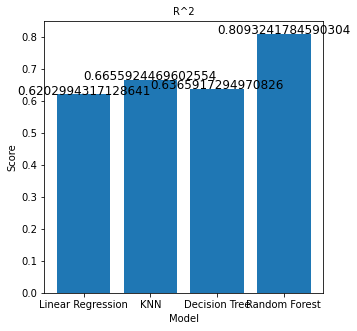

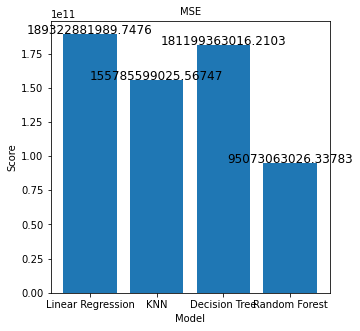

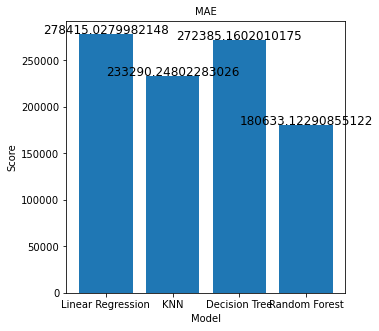

In [142]:
tl = ['R^2','MSE','MAE']
name = ['Score R^2 before Fine_Tuning','Score R^2 Fine_Tuning','MSE before Fine_Tuning','MSE Fine_Tuning','MAE before Fine_Tuning','MAE Fine_Tuning']

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]*1, y[i], ha = 'center')
for i in range(len(tb1.columns)):
    if __name__ == '__main__':

        # creating data on which bar chart will be plot
        x = table['Model']
        y = tb1[tb1.columns[i]]
        # setting figure size by using figure() function 
        plt.figure(figsize = (5, 5))

        # making the bar chart on the data
        plt.bar(x, y)

        # calling the function to add value labels
        addlabels(x, y)


        # giving X and Y labels
        plt.xlabel("Model")
        plt.ylabel("Score")
        plt.title(tl[i])
        # visualizing the plot
        plt.show()

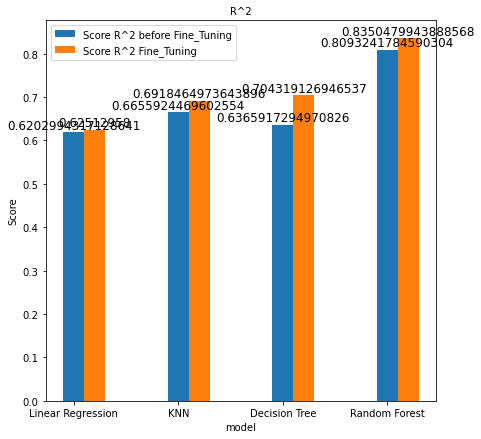

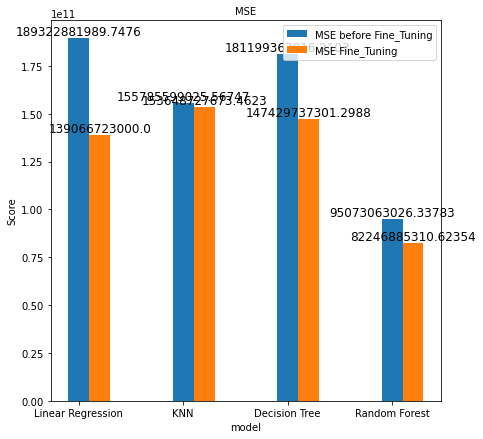

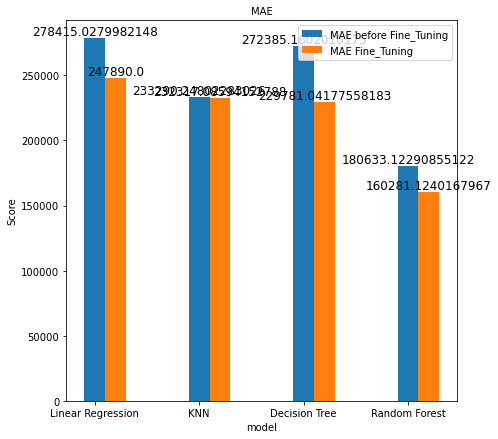

In [143]:
bm = ['R^2','R^2','MSE','MSE','MAE','MAE']
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1*h, float(h),
                    ha='center', va='bottom')
for i in range(0,len(name),2):
    plt.figure(figsize = (7, 7))
    w = 0.2
    x = table['Model']
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    b = plt.bar(bar1,table[name[i]],w,label=name[i])
    c = plt.bar(bar2,table[name[i+1]],w,label=name[i+1])
    plt.xticks(bar1,x)
    plt.xlabel("model")
    plt.ylabel("Score")
    plt.title(bm[i])
    plt.rc('font', size=12) 
    autolabel(b)
    autolabel(c)
    plt.legend()
    plt.show()